In [19]:
import sys
sys.path.append('/global/homes/j/jpiat/')

import numpy as np
from astropy.io import fits
from astropy.table import vstack,Table
import matplotlib.pyplot as plt
#from Relativistic_effects.split_mocks_eff import magnitude_split
from Relativistic_effects.split_mocks import magnification_bias
from my_hodpy.hodpy.cosmology import CosmologyAbacus

cosmo = CosmologyAbacus(0)  #c000 cosmology

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # fontsize of the tick labels

In [20]:
path_in = '/global/cfs/cdirs/desi/cosmosim/SecondGenMocks/AbacusSummit/CutSky/BGS/'
#file_cutsky = path_in+'v0.1/z0.200/cutsky_BGS_z0.200_AbacusSummit_base_c000_ph006.fits'
#file_cutsky = '/global/cfs/cdirs/desi/users/sbrieden/abacus/Ab_c000_ph006/z0.200/BGS_SecondGen/cutsky_BGS_z0.200_AbacusSummit_base_c000_ph006_pot.fits'
#file_cutsky = path_in+'v1/z0.200/cutsky_BGS_z0.200_AbacusSummit_base_c000_ph001.fits'
file_cutsky = '/pscratch/sd/j/jpiat/Abacus_mocks/z0.200/AbacusSummit_base_c000_ph000/cutsky/galaxy_cut_sky_NS.fits'


m_lim = 19.5   # BGS magnitude cut
n_bins = 20    # number of redshift bins
z_max = 0.5    # max redshift

path_out = '/pscratch/sd/j/jpiat/Abacus_mocks/z0.200/AbacusSummit_base_c000_ph000/cutsky/magnitude_splits/NS/'

In [33]:
old_ver = path_in+'v0.1/z0.200/cutsky_BGS_z0.200_AbacusSummit_base_c000_ph006.fits'
new_ver_N = '/pscratch/sd/j/jpiat/Abacus_mocks/z0.200/AbacusSummit_base_c000_ph000/cutsky/N/galaxy_cut_sky_N.fits'
new_ver_S = '/pscratch/sd/j/jpiat/Abacus_mocks/z0.200/AbacusSummit_base_c000_ph000/cutsky/S/galaxy_cut_sky_S.fits'
phi_N = np.loadtxt('/global/homes/j/jpiat/my_hodpy/lookup/bgs/bgs_N_cumulative_lf.dat')
phi_S = np.loadtxt('/global/homes/j/jpiat/shared/hodpy_alex/lookup/bgs/bgs_samples_cumulative_lf_c000_ph000_wsys.dat')

cat = fits.open(new_ver_N)
data_N = Table(cat[1].data)
cat.close()

cat = fits.open(old_ver)
data_old = Table(cat[1].data)
cat.close()

cat = fits.open(new_ver_S)
data_S = Table(cat[1].data)
cat.close()

#cat = fits.open(old_ver)
#data_old = Table(cat[1].data)
#cat.close()

In [37]:
bins = np.linspace(-27,-10,50)
b_M = 0.5*(bins[:-1]+bins[1:])


n_N, b = np.histogram(data_N['R_MAG_ABS'][(data_N['Z']>0.19) * (data_N['Z']<0.21)],bins=bins)
N_N = np.cumsum(n_N)

n_S, b = np.histogram(data_S['R_MAG_ABS'][(data_S['Z']>0.19) * (data_S['Z']<0.21)],bins=bins)
N_S = np.cumsum(n_S)

n_old, b = np.histogram(data_old['R_MAG_ABS'][(data_old['Z']>0.19) * (data_old['Z']<0.21)],bins=bins)
N_old = np.cumsum(n_old)

print(np.min(data_N['Z']))

0.0010288086


/tmp/ipykernel_1741057/2618773362.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(b_M,np.log10(N_S),label='v1 S')
/tmp/ipykernel_1741057/2618773362.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(b_M,np.log10(N_N),c='m',label='v1 N')
/tmp/ipykernel_1741057/2618773362.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(b_M,np.log10(N_old),'--',c='dimgray',label='v0.1')


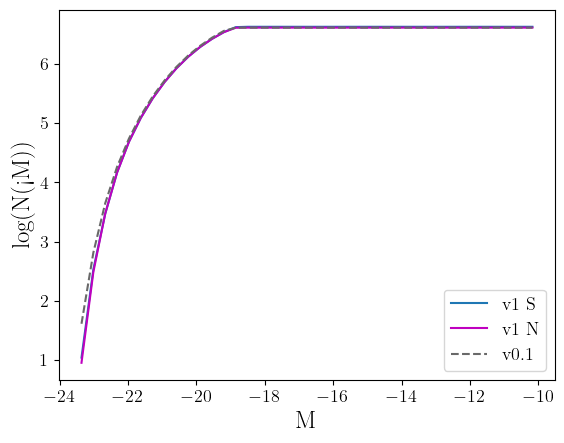

In [38]:
dM = bins[1] - bins[0]
V = 4/3*np.pi*cosmo.comoving_distance(0.21)**3 - 4/3*np.pi*cosmo.comoving_distance(0.19)**3

plt.plot(b_M,np.log10(N_S),label='v1 S')
plt.plot(b_M,np.log10(N_N),c='m',label='v1 N')
plt.plot(b_M,np.log10(N_old),'--',c='dimgray',label='v0.1')
plt.ylabel(r'log(N(<M))')
plt.xlabel('M')
plt.legend()

/tmp/ipykernel_1741057/1902654823.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(b_M,np.log10(N_S/dM/V),label='v1 S')
/tmp/ipykernel_1741057/1902654823.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(b_M,np.log10(N_N/dM/V),c='m',label='v1 N')
/tmp/ipykernel_1741057/1902654823.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot(b_M,np.log10(N_old/dM/V),'--',c='dimgray',label='v0.1')


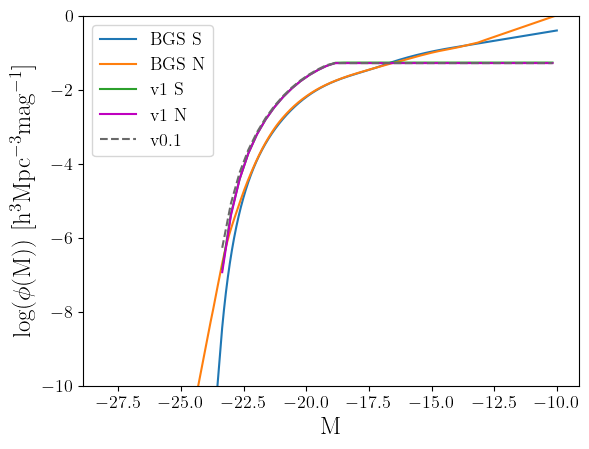

In [39]:
dM = bins[1] - bins[0]

plt.plot(phi_S[:,0],phi_S[:,1],label='BGS S')
plt.plot(phi_N[:,0],phi_N[:,1],label='BGS N')
plt.plot(b_M,np.log10(N_S/dM/V),label='v1 S')
plt.plot(b_M,np.log10(N_N/dM/V),c='m',label='v1 N')
plt.plot(b_M,np.log10(N_old/dM/V),'--',c='dimgray',label='v0.1')
plt.ylim((-10,0))
plt.ylabel(r'log($\phi$(M)) [$\rm h^3Mpc^{-3}mag^{-1}$]')
plt.xlabel('M')
plt.legend()

In [15]:
bins = np.linspace(7,20.2,50)
b_M = 0.5*(bins[:-1]+bins[1:])

n_N, b = np.histogram(data_N['R_MAG_APP'][data_N['Z']<0.4],bins=bins)
N_N = np.cumsum(n_N)

n_S, b = np.histogram(data_S['R_MAG_APP'][data_S['Z']<0.4],bins=bins)
N_S = np.cumsum(n_S)

n_old, b = np.histogram(data_old['R_MAG_APP'][data_old['Z']<0.4],bins=bins)
N_old = np.cumsum(n_old)

/tmp/ipykernel_1741057/2609931993.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(b_M,np.log10(N_S),c='olivedrab',label='v1 S')
/tmp/ipykernel_1741057/2609931993.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(b_M,np.log10(N_N),c='goldenrod',label='v1 N')


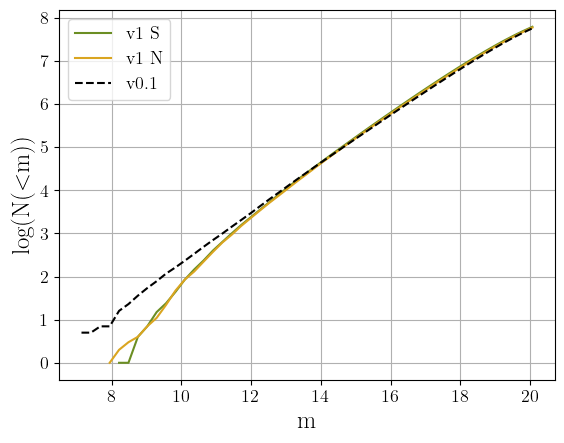

In [18]:
dM = bins[1] - bins[0]
V = 4/3*np.pi*cosmo.comoving_distance(0.4)**3

x = np.linspace(5,20,1000)
plt.plot(b_M,np.log10(N_S),c='olivedrab',label='v1 S')
plt.plot(b_M,np.log10(N_N),c='goldenrod',label='v1 N')
plt.plot(b_M,np.log10(N_old),'--',c='k',label='v0.1')
#plt.semilogy(x,0.03*10**(0.47*x),label=r'$10^{\rm sm}$')
plt.ylabel(r'log(N($<$m))')
plt.xlabel('m')
plt.grid()
plt.legend()

In [ ]:
### magnification bias

m = data_new['R_MAG_APP']
z = data_new['Z']
cond = (np.isnan(m)==False)*(m<=m_lim)*(z<=z_max)
m = m[cond]
z = z[cond]
z_bins = np.linspace(0,0.5,30)
s = np.zeros(len(z_bins))
s_eff = 0

for i in range(len(z_bins)-1):
    
    if i==(len(z_bins)-1):
        keep = (z>=z_bins[i])*(z<=z_bins[i+1])
    else:
        keep = (z>=z_bins[i])*(z<z_bins[i+1])
        
    mi = m[keep]
    n,bins = np.histogram(mi,20)
    N = np.cumsum(n)
    m_bin = 0.5*(bins[1:]+bins[:-1])
    
    s[i] = (np.log10(N[-1])-np.log10(N[-2]))/(m_bin[-1]-m_bin[-2])
    s_eff += s[i]*len(mi)/len(m)
    
print(s)
print(s_eff)
print((np.log10(N_new[-1])-np.log10(N_new[-2]))/(b_new[-1]-b_new[-2]))

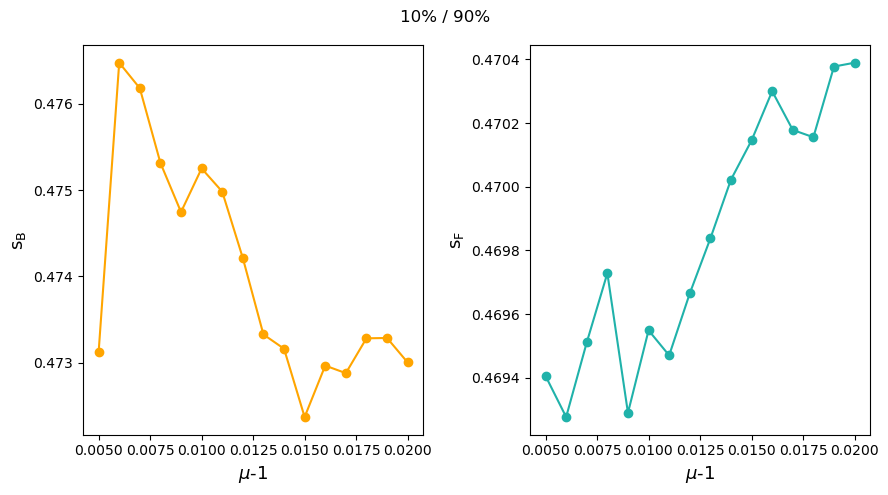

10 / 90 mean magnification biases: s_b = 0.47403555419640375, s_f = 0.46983141960420527, ds = 0.004204134592198483


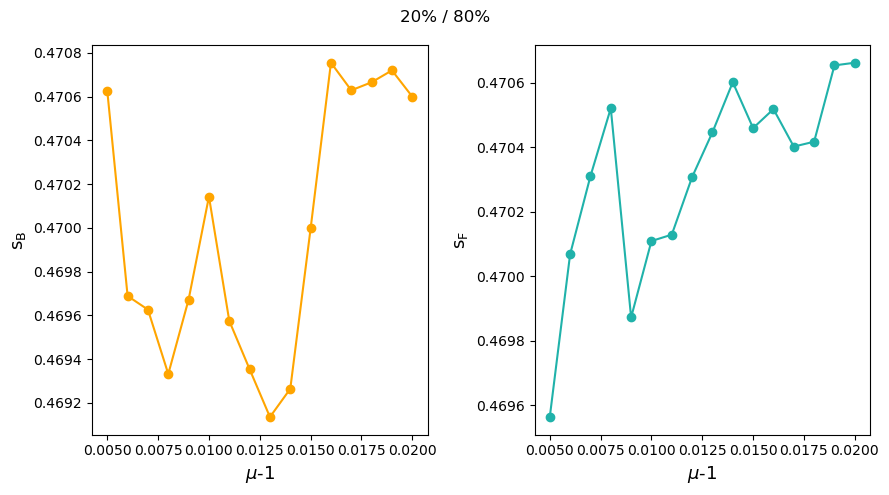

20 / 80 mean magnification biases: s_b = 0.46998605825655654, s_f = 0.4703151766671506, ds = -0.00032911841059407587


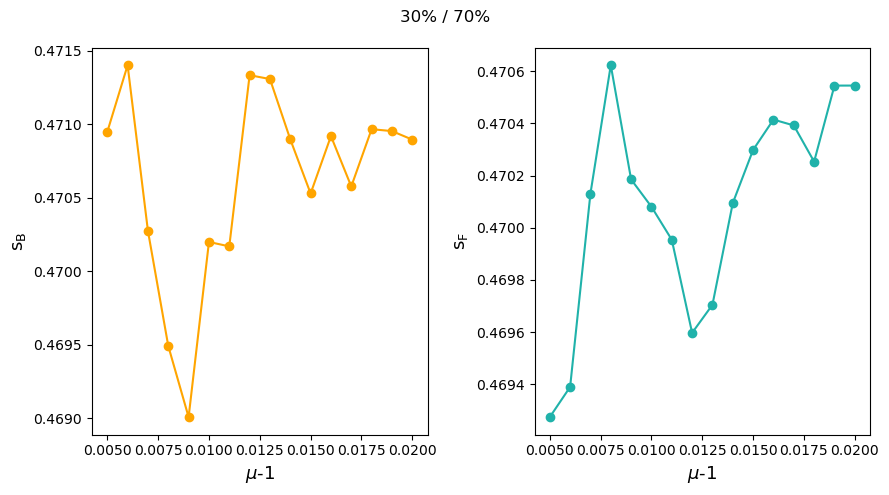

30 / 70 mean magnification biases: s_b = 0.47061540741204916, s_f = 0.47009281700217814, ds = 0.0005225904098710155


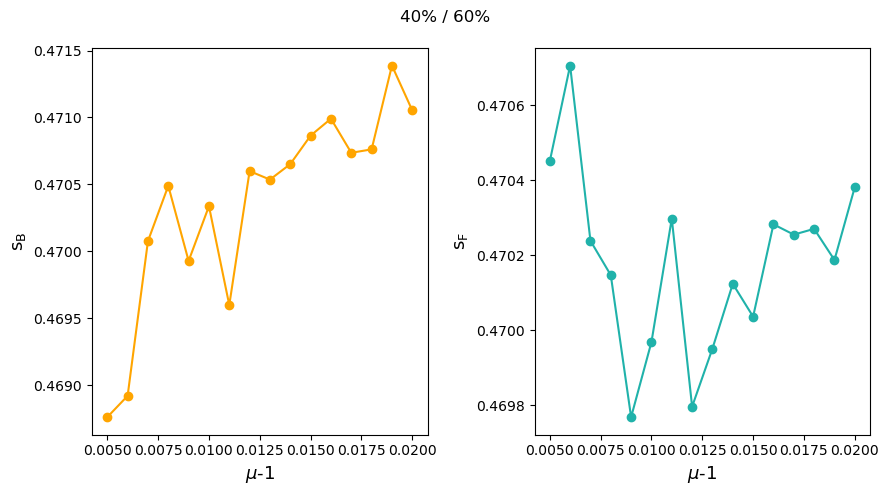

40 / 60 mean magnification biases: s_b = 0.47035551946721865, s_f = 0.4701788288421604, ds = 0.00017669062505826227


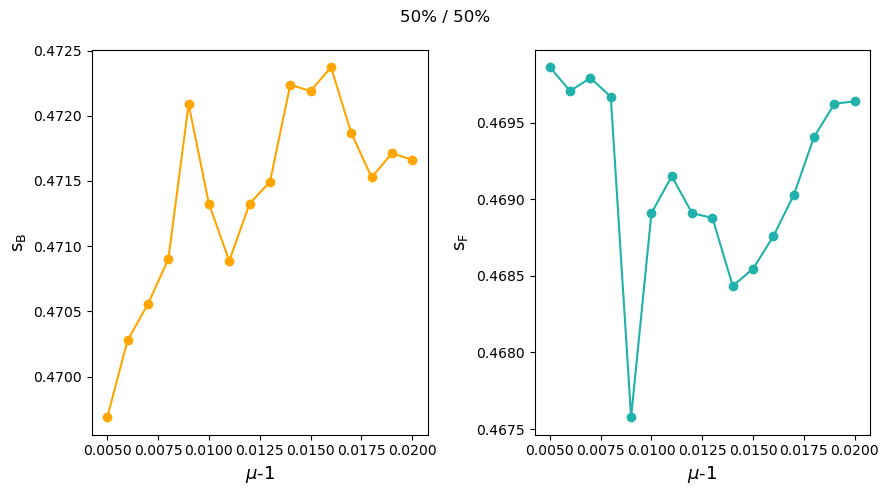

50 / 50 mean magnification biases: s_b = 0.47138151039616394, s_f = 0.46911798141864786, ds = 0.0022635289775160827


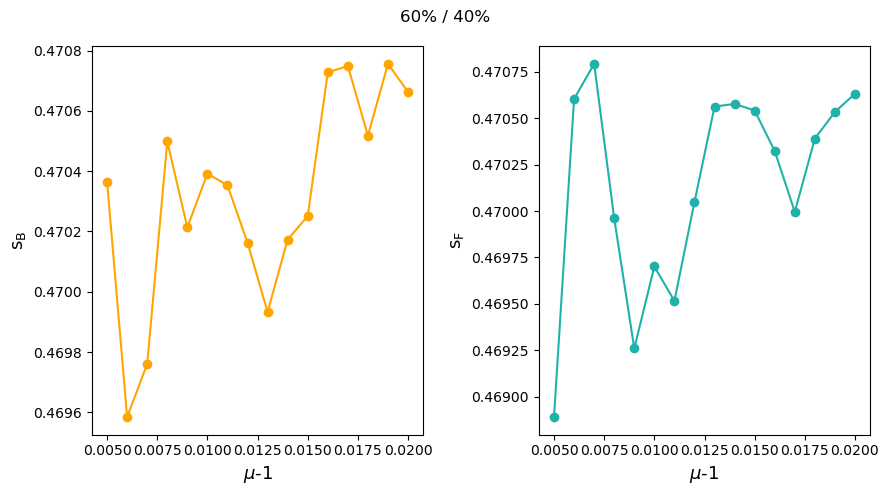

60 / 40 mean magnification biases: s_b = 0.4703187775743413, s_f = 0.47014549936323474, ds = 0.0001732782111065756


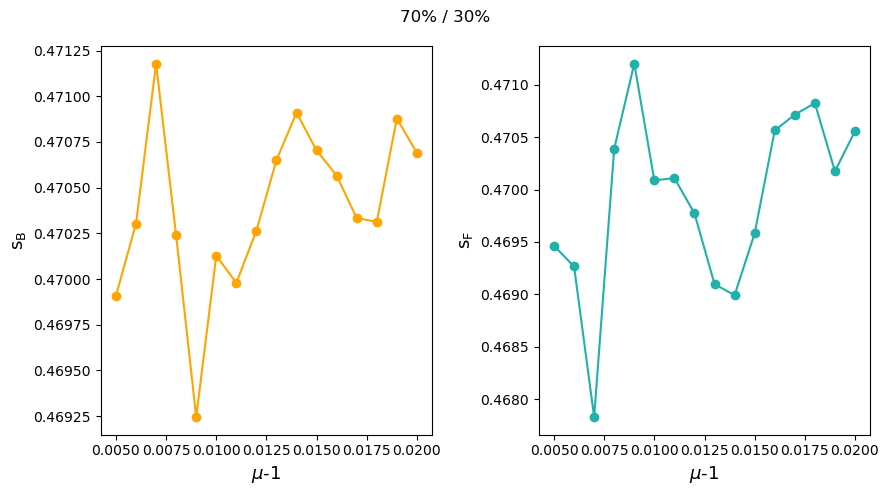

70 / 30 mean magnification biases: s_b = 0.4703931496708059, s_f = 0.46991410804160993, ds = 0.0004790416291959865


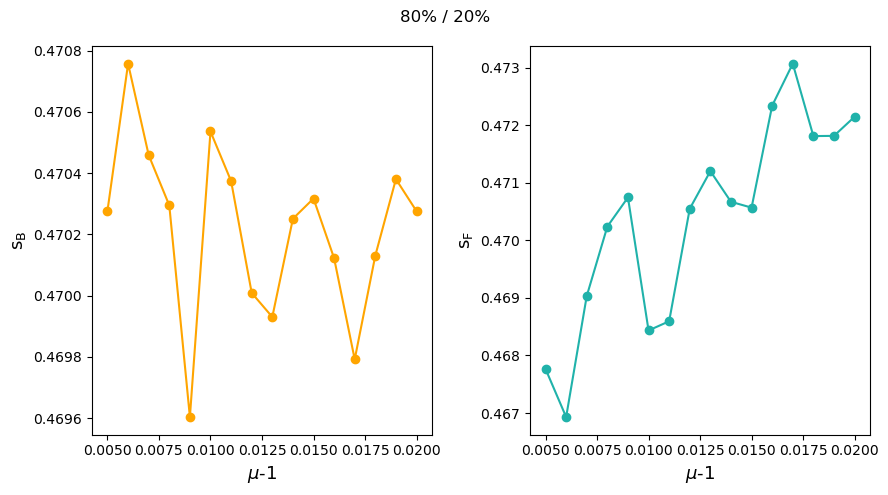

80 / 20 mean magnification biases: s_b = 0.47021930085967134, s_f = 0.470370204409081, ds = -0.00015090354940966444


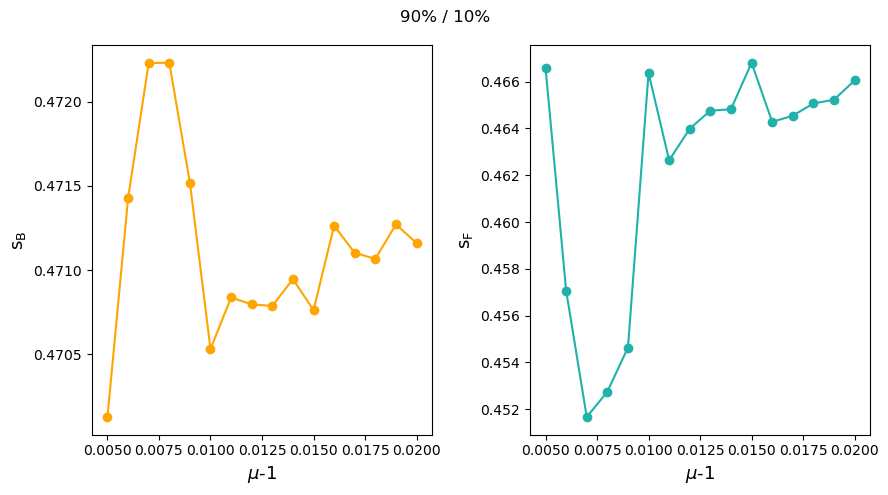

90 / 10 mean magnification biases: s_b = 0.47112909796364855, s_f = 0.462329075953364, ds = 0.00880002201028457


In [3]:
#cut_bright = np.array([10,20,30,40,50,60,70,80,90])
#cut_faint = 100-cut_bright
cut_bright = [10,20,30,40,50,60,70,80,90]
cut_faint = [90,80,70,60,50,40,30,20,10]

for i, (cut_b, cut_f) in enumerate(zip(cut_bright, cut_faint)):
    
    magnification_bias(file_cutsky, m_lim, z_max, n_bins, cut_b, cut_f, path_out)   
    #magnitude_split(file_cutsky, m_lim, z_max, n_bins, cut_b, cut_f, path_out)

In [9]:
cat = fits.open('/pscratch/sd/j/jpiat/Abacus/Ab_c000_ph006/z0.200/Split/BGS/v2/cutsky_zmax0.5_m19.5_faint_10.fits')
data = Table(cat[1].data)
cat.close()

data

RA,DEC,DIST_COM,DIST_RSD,DIST_RSD+GR
float64,float64,float32,float32,float32
270.0336608886719,10.398754119873047,1318.9517,1304.223,1303.9735
270.08026123046875,-9.128500938415527,1192.9801,1189.7626,1189.6191
270.05792236328125,-8.570843696594238,1137.3718,1136.668,1136.552
270.0704345703125,-23.686660766601562,1112.1365,1115.1704,1115.0266
270.0734558105469,-0.7528071403503418,1011.45764,1015.8444,1015.76953
270.0794372558594,-5.068953514099121,1013.0083,1012.38354,1012.2825
270.1326599121094,-9.985413551330566,1184.1469,1184.708,1184.5199
270.0813293457031,-12.058939933776855,1142.302,1144.6371,1144.5123
270.1448974609375,-1.0269935131072998,1072.3395,1072.0303,1071.9185


In [17]:
# redshfit distribution 

sky = fits.open(file_cutsky)
data = Table(sky[1].data)
sky.close()


z_cos = data['Z_COSMO']
m_app = data['R_MAG_APP']

cond = (np.isnan(m_app)==False)*(m_app<=m_lim)

z = z_cos[cond]

dz = 0.01
bins = np.arange(0,0.5+dz,dz)
z_bin = bins[:-1]+dz/2
h_cos, _ = np.histogram(z_cos,bins=bins)
h, _ = np.histogram(z,bins=bins)

z_cos_med = np.median(z_cos)
z_cos_max = z_bin[h_cos == np.max(h_cos)]

z_med = np.median(z)
z_max = z_bin[h == np.max(h)]


plt.plot(z_bin,h_cos,'--',label='full mock')
plt.plot(z_bin,h,label='m_app < 19.5')
plt.axvline(z_med,color='k',label='median')
plt.axvline(z_max,color='r',label='max')
plt.axvline(z_cos_med,color='k',ls='--')
plt.axvline(z_cos_max,color='r',ls='--')
plt.xlabel('z')
plt.ylabel('N(z)')
plt.legend()

In [5]:
cut_faint = [10,20,30,40,50,60,70,80,90,10,20,30,40]
cut_bright = [90,80,70,60,50,40,30,20,10,10,20,30,40]
space = 'real'

s = np.zeros((len(cut_bright),3))

for i, (cut_b, cut_f) in enumerate(zip(cut_bright, cut_faint)):
    
    s[i] = split_mag_eff(file_cutsky, space, m_lim, z_max, n_bins, cut_b, cut_f, path_out)    
    
#path = '/global/homes/j/jpiat/data/'
#np.savetxt(path+f"mag_bias_{space}.dat", mag_bias)

90 / 10 
effective magnification biases: s_bright = 0.28000803985380546, s_faint = 0.11081642822561129, ds = 0.16919161162819418
test: 0.21252339768237238
80 / 20 
effective magnification biases: s_bright = 0.29969094939206026, s_faint = 0.11668049067814597, ds = 0.1830104587139143
test: 0.16752703727448837
70 / 30 
effective magnification biases: s_bright = 0.3230928620353163, s_faint = 0.12307943168757897, ds = 0.20001343034773733
test: 0.15699358851259282


KeyboardInterrupt: 

In [ ]:
ds = s[:,2]

xticks = ['10/90','20/80','30/70','40/60','50/50','60/40','70/30','80/20','90/10','10/10','20/20','30/30','40/40']
x = range(len(xticks))

plt.rc('axes', labelsize=13)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels

fig, ax = plt.subplots(1,1)
ax.set_xlabel('% faint / % bright')
ax.set_ylabel(r'$\Delta$s')

ax.axvspan(7.7, 10.3, color='tomato', alpha=0.5)
ax.axhline(0.5,c='k',ls='--')
ax.scatter(x,ds,s=30,color='lightseagreen')
ax.set_xticks(x,xticks,rotation=45);

In [ ]:
space = 'real'

cut_faint = [10,20,30,40,50,60,70,80,90]
cut_bright = [90,80,70,60,50,40,30,20,10]

labels = ['10/90','50/50']

plt.rc('axes', labelsize=13)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # fontsize of the tick labels

z = np.linspace(0,0.5,200)

plt.figure()
plt.xlabel('z')
plt.ylabel('magnitude cut')

for i, (cut_b, cut_f) in enumerate(zip(cut_bright, cut_faint)):
    
    mb, mf = split_magnitudes(file_cutsky, space, m_lim, z_max, n_bins, cut_b, cut_f, path_out)    
    plt.plot(z,mb(z),label=f'{cut_f}% / {cut_b}%')
    
plt.legend()

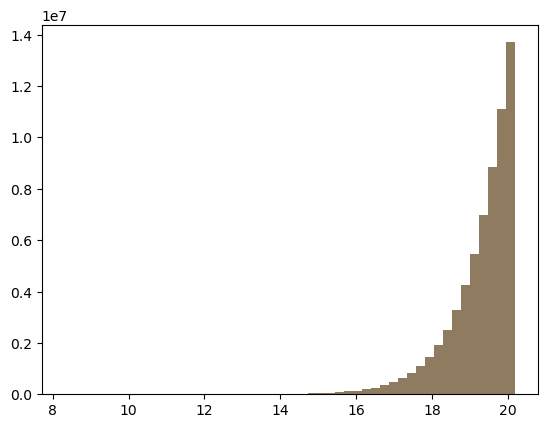

In [6]:
#file = '/global/cfs/cdirs/desi/users/sbrieden/abacus/Ab_c000_ph006/z0.200/BGS_SecondGen/cutsky_BGS_z0.200_AbacusSummit_base_c000_ph006_pot.fits'

file_b = '/pscratch/sd/j/jpiat/Abacus/Ab_c000_ph006/z0.200/Split/BGS/cutsky_real_zmax0.5_m19.5_bright_50.fits'
#file_r = '/pscratch/sd/j/jpiat/Abacus/Ab_c000_ph006/z0.200/Split/BGS/randoms_10_cutsky_zmax0.5.fits'
file_r = '/global/cfs/cdirs/desi/cosmosim/SecondGenMocks/AbacusSummit/CutSky/BGS/v0.1/z0.200/random_S100_1X.fits'
file_cutsky =  '/global/cfs/cdirs/desi/cosmosim/SecondGenMocks/AbacusSummit/CutSky/BGS/v0.1/z0.200/cutsky_BGS_z0.200_AbacusSummit_base_c000_ph000.fits'

cutsky = fits.open(file_cutsky)
#print(cutsky[1].columns)
data = cutsky[1].data
cutsky.close()

#sky_b = Table.read(file_b)
sky_r = Table.read(file_r)

plt.hist(data['R_MAG_APP'],50)
plt.hist(sky_r['R_MAG_APP'],50,alpha=0.5);

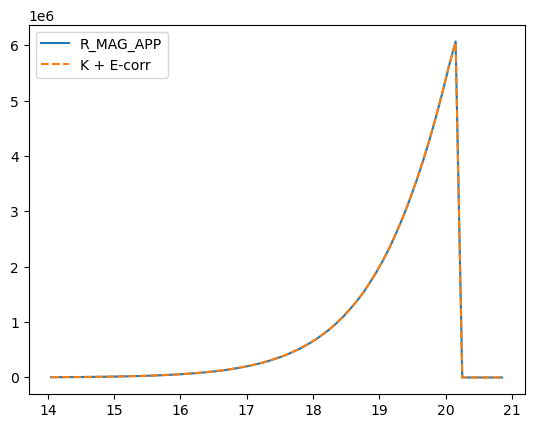

In [45]:
import sys
sys.path.append('/global/homes/j/jpiat/shared_code/abacus_mocks/')

from hodpy.cosmology import CosmologyAbacus
from hodpy.k_correction import GAMA_KCorrection
from hodpy import lookup
from Relativistic_effects.gravitational_redshift import z_grav

cosmo = CosmologyAbacus(0)  #c000 cosmology
kcorr_r = GAMA_KCorrection(cosmo, k_corr_file=lookup.kcorr_file, cubic_interpolation=True)

file_cutsky = '/global/cfs/cdirs/desi/users/sbrieden/abacus/Ab_c000_ph006/z0.200/BGS_SecondGen/cutsky_BGS_z0.200_AbacusSummit_base_c000_ph006_pot.fits'

#file_cutsky = '/global/cfs/cdirs/desi/cosmosim/SecondGenMocks/AbacusSummit/CutSky/BGS/v0.1/z0.200/random_S100_1X.fits'

#file_cutsky = '/global/cfs/cdirs/desi/cosmosim/SecondGenMocks/AbacusSummit/CutSky/BGS/v0.1/z0.200/cutsky_BGS_z0.200_AbacusSummit_base_c000_ph000.fits'

cutsky = fits.open(file_cutsky)
data = cutsky[1].data
cutsky.close()

z_cos = data['Z_COSMO']
z = data['Z']
m_mock = data['R_MAG_APP']
M = data['R_MAG_ABS']
g_r = data['G_R_REST']
#phi = data['Pot A Soft 7']
#phi0 = phi[z==np.min(z)]

#z = z_grav(z_cos, z, phi, phi0)

Q = 0.8
EC =  Q*(z - 0.1)
m = kcorr_r.apparent_magnitude(M, z, g_r)-EC

m = m[m<=20.2]

#
#EC =  Q*(z - 0.1)
#m = kcorr_r.apparent_magnitude(M, z, g_r)-1*EC
#
#EC_g =  Q*(z_g - 0.1)
#m_g = kcorr_r.apparent_magnitude(M, z_g, g_r)-1*EC_g


mbins = np.arange(14,21,0.1)
mcenters = mbins[:-1]+0.05

hm, _ = np.histogram(m,bins=mbins)
#hm_mock, _ = np.histogram(m_mock,bins=mbins)

plt.figure()
plt.plot(mcenters, hm_mock, label='R_MAG_APP')
plt.plot(mcenters, hm, ls = '--', label='K + E-corr')
plt.legend();

In [5]:
file_sam = '/global/cfs/cdirs/desi/users/sbrieden/abacus/Ab_c000_ph006/z0.200/BGS_SecondGen/cutsky_BGS_z0.200_AbacusSummit_base_c000_ph006_pot.fits'
file_alex = '/global/cfs/cdirs/desi/cosmosim/SecondGenMocks/AbacusSummit/CutSky/BGS/v0.1/z0.200/cutsky_BGS_z0.200_AbacusSummit_base_c000_ph006.fits'

sky_sam = fits.open(file_sam)
sam = sky_sam[1].data
sky_sam.close()

sky_alex = fits.open(file_alex)
alex = sky_alex[1].data
sky_alex.close()

z_sam = sam['Z']
z_alex = alex['Z']

M = sam['R_MAG_ABS']
g_r = sam['G_R_REST']

Text(0, 0.5, 'N(z)')

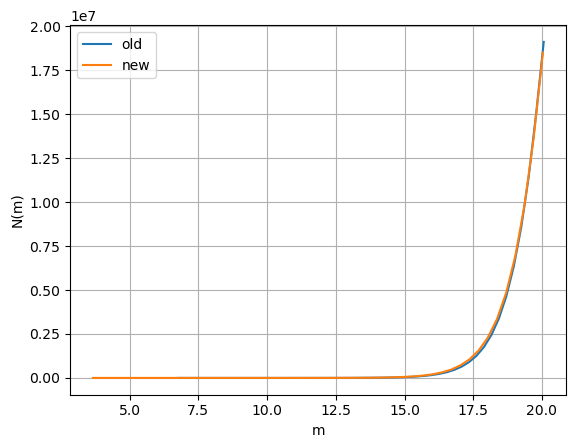

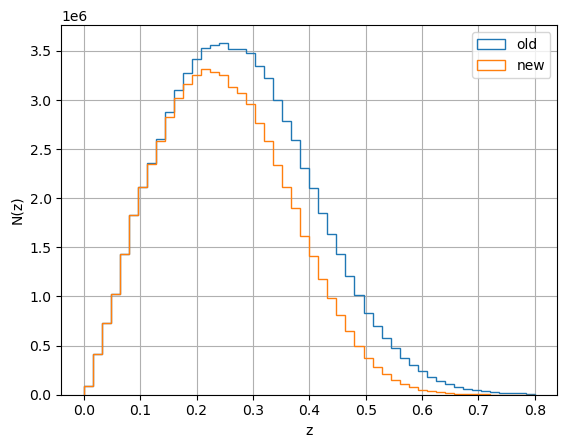

In [9]:
m_sam = sam['R_MAG_APP']
m_alex = alex['R_MAG_APP']

h_sam, bins_s = np.histogram(m_sam,50)
bins_s = (bins_s[1:]+bins_s[:-1])/2
h_alex, bins_a = np.histogram(m_alex,50)
bins_a = (bins_a[1:]+bins_a[:-1])/2

plt.figure()
plt.plot(bins_s, h_sam, label = 'old')
plt.plot(bins_a, h_alex, label = 'new')
plt.grid()
plt.xlabel('m')
plt.ylabel('N(m)')
plt.legend()

plt.figure()
plt.hist(z_sam, 50, label = 'old', histtype = 'step')
plt.hist(z_alex, 50, label = 'new', histtype = 'step')
plt.grid()
plt.legend()
plt.xlabel('z')
plt.ylabel('N(z)')

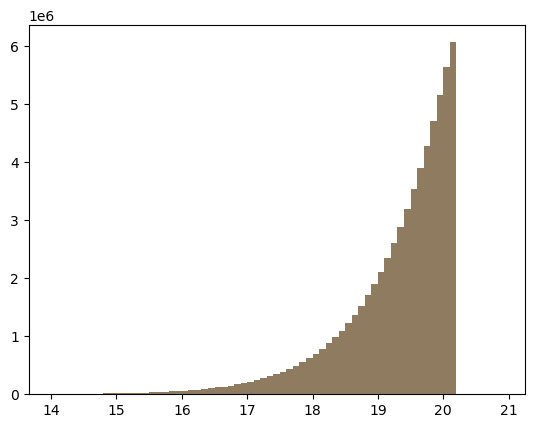

In [44]:
Q = 0.8
EC =  Q*(z - 0.1)
m = kcorr_r.apparent_magnitude(M, z_sam, g_r)-EC

m = m[m <= 20.2]

mbins = np.arange(14,21,0.1)

plt.hist(m,bins=mbins)
plt.hist(alex['R_MAG_APP'], bins=mbins,alpha=0.5);

In [15]:
import sys
sys.path.append('/global/homes/j/jpiat/shared_code/abacus_mocks/')

from hodpy.cosmology import CosmologyAbacus
from hodpy.k_correction import GAMA_KCorrection
from hodpy import lookup
from Relativistic_effects.gravitational_redshift import z_grav

cosmo = CosmologyAbacus(0)  #c000 cosmology
kcorr_r = GAMA_KCorrection(cosmo, k_corr_file=lookup.kcorr_file, cubic_interpolation=True)

file_cutsky = '/global/cfs/cdirs/desi/users/sbrieden/abacus/Ab_c000_ph006/z0.200/BGS_SecondGen/cutsky_BGS_z0.200_AbacusSummit_base_c000_ph006_pot.fits'
file_random = '/pscratch/sd/j/jpiat/Abacus/Ab_c000_ph006/z0.200/Split/BGS/randoms_10_cutsky_grav_zmax0.5.fits'

cutsky = fits.open(file_cutsky)
data = cutsky[1].data
cutsky.close()

randsky = fits.open(file_random)
rand = randsky[1].data
randsky.close()

M = data['R_MAG_ABS']
g = data['G_R_REST']

z_cos = data['Z_COSMO']
z = data['Z']
phi = data['Pot A Soft 7']
phi0 = phi[z_cos == np.min(z_cos)]
z_g = z_grav(z_cos,z,phi,phi0)

z_r = rand['Z']

In [16]:
#m_r = kcorr_r.apparent_magnitude(M_r, z_r, g_r) - 0.8*(z_r-0.1)
m_g = kcorr_r.apparent_magnitude(M, z_g, g) - 0.8*(z_g-0.1)

#cond = (z_r<=0.5) & (m_r<=19.5)
cond_g = (z<=0.5) & (m_g<=19.5)

#z_r = z_r[cond]
z_g = z_g[cond_g]

zmax = max(np.max(z_r), np.max(z_g))

zbins = np.arange(0,zmax,0.01)
zcenters = zbins[:-1]+0.005

hz, _ = np.histogram(z_r,bins=zbins,density=True)
hz_g, _ = np.histogram(z_g,bins=zbins,density=True)

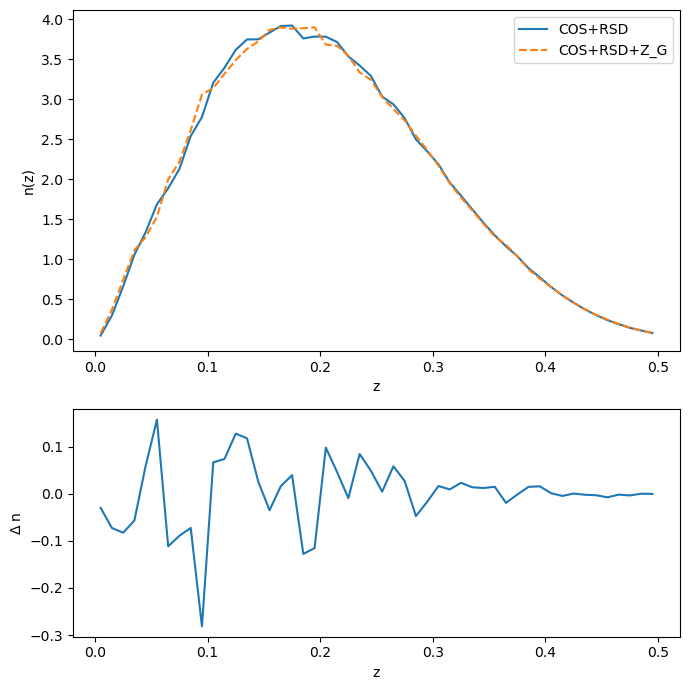

In [17]:
fig, axs = plt.subplots(2, 1, figsize = (7,7), layout='tight',height_ratios=[3, 2])

axs[0].plot(zcenters, hz,label='COS+RSD')
axs[0].plot(zcenters, hz_g, '--', label='COS+RSD+Z_G')
axs[0].set_ylabel('n(z)')
axs[0].set_xlabel('z')

axs[1].plot(zcenters, (hz-hz_g))
axs[1].set_ylabel(r'$\Delta$ n')
axs[1].set_xlabel('z')

axs[0].legend();

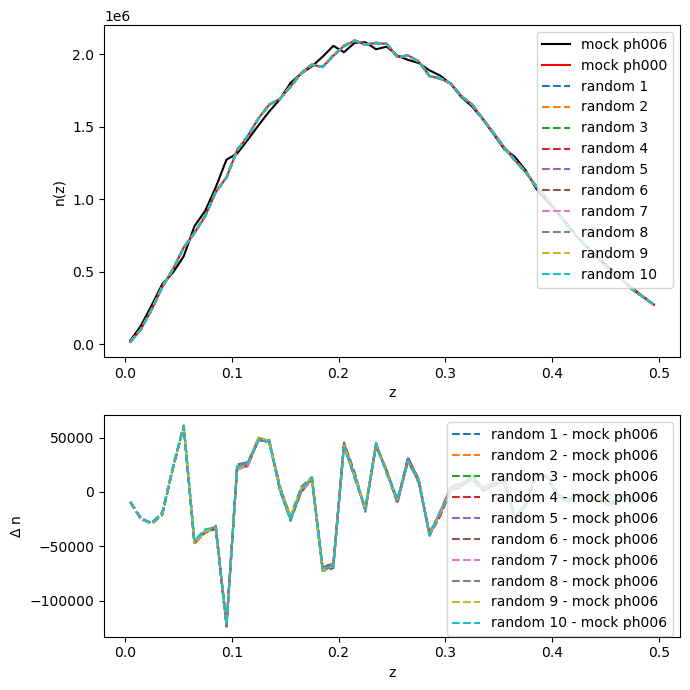

In [16]:
path_in = '/global/cfs/cdirs/desi/cosmosim/SecondGenMocks/AbacusSummit/CutSky/BGS/v0.1/z0.200/'

file_cutsky0 = '/global/cfs/cdirs/desi/cosmosim/SecondGenMocks/AbacusSummit/CutSky/BGS/v0.1/z0.200/cutsky_BGS_z0.200_AbacusSummit_base_c000_ph000.fits'
file_cutsky6 = '/global/cfs/cdirs/desi/cosmosim/SecondGenMocks/AbacusSummit/CutSky/BGS/v0.1/z0.200/cutsky_BGS_z0.200_AbacusSummit_base_c000_ph006.fits'

cutsky0 = fits.open(file_cutsky0)
data0 = cutsky0[1].data
cutsky0.close()

cutsky6 = fits.open(file_cutsky6)
data6 = cutsky6[1].data
cutsky6.close()

dz = 0.01
zbins = np.arange(0,0.5+dz,dz)
zb = zbins[:-1]+0.005


h0, _ = np.histogram(data0['Z'],bins=zbins)
h6, _ = np.histogram(data6['Z'],bins=zbins)


fig, axs = plt.subplots(2, 1, figsize = (7,7), layout='tight',height_ratios=[3, 2])

axs[0].plot(zb, h6, 'k', label='mock ph006')
axs[0].plot(zb, h0, 'r', label='mock ph000')
axs[0].set_ylabel('n(z)')
axs[0].set_xlabel('z')

n_randoms = 10

for i in range(1,n_randoms+1):
        
    input_file = path_in+'random_S'+str(i)+'00_1X.fits'
    
    sky = fits.open(input_file)
    data = Table(sky[1].data)
    sky.close()
    
    h, _ = np.histogram(data['Z'],bins=zbins)
    
    axs[0].plot(zb, h, '--', label=f'random {i}')
    
    axs[1].plot(zb, (h-h6), '--', label = f'random {i} - mock ph006')
    axs[1].set_ylabel(r'$\Delta$ n')
    axs[1].set_xlabel('z')
    
        
axs[0].legend(loc='upper right')
axs[1].legend();

In [9]:
import sys
sys.path.append('/global/homes/j/jpiat/shared_code/abacus_mocks/')

import numpy as np
from hodpy.cosmology import CosmologyAbacus
from hodpy.k_correction import GAMA_KCorrection
from hodpy import lookup

cosmo = CosmologyAbacus(0)  #c000 cosmology
kcorr_r = GAMA_KCorrection(cosmo, k_corr_file=lookup.kcorr_file, cubic_interpolation=True)


#z = np.ones(len(M)) * 0.4

#gr = np.ones(len(z)) * 0.5
#print(kcorr_r.k(z, gr))
#print(cosmo.comoving_distance(z))

z = np.arange(0.1,0.6,0.1)
M = np.linspace(-22,-17,len(z))
gr = np.ones(len(z)) * 0.5

D = np.array([292.58372014, 570.41929934, 833.30733785, 1081.39386244, 1315.09205009])

print(kcorr_r.apparent_magnitude(M, z, gr))
print(M + 5*np.log10((1.+z)*D) + 25 + kcorr_r.k(z,gr))
print(cosmo.comoving_distance(z)-D)

check
[15.43473636 18.35122602 20.62299216 22.66757258 24.62872663]
[15.4347325  18.35122405 20.62299081 22.66757154 24.62872577]
[0.00051957 0.00051883 0.00051848 0.00051835 0.00051848]


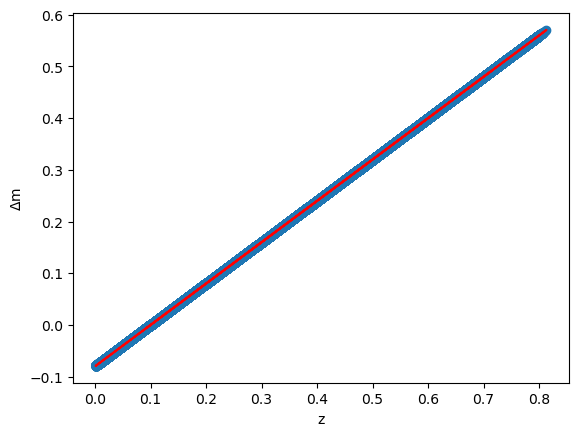

In [15]:
plt.figure()
plt.scatter(z_cos,m-m_mock)
plt.xlabel('z')
plt.ylabel(r'$\rm \Delta$m')
plt.plot(z_cos,EC,'r')

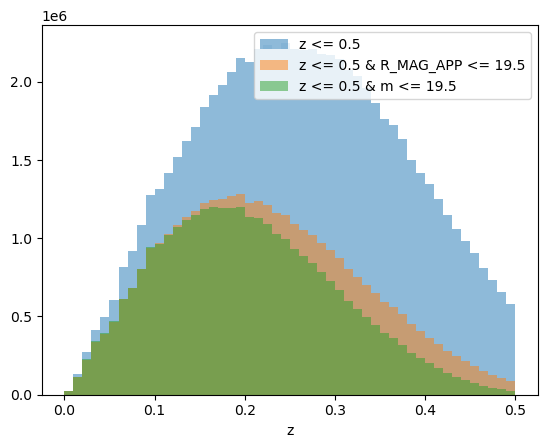

In [3]:
cond1 = (z<=0.5) & (m_mock<=19.5) 
cond2 = (z<=0.5) & (m<=19.5)
cond3 = (z<=0.5)
z1 = z[cond1]
z2 = z[cond2]
z3 = z[cond3]

plt.figure()
plt.hist(z3, 50, alpha = 0.5, label = 'z <= 0.5')
plt.hist(z1, 50, alpha = 0.5, label = 'z <= 0.5 & R_MAG_APP <= 19.5')
plt.hist(z2, 50, alpha = 0.5, label = 'z <= 0.5 & m <= 19.5')
plt.xlabel('z')
plt.legend();

In [18]:
a = 6
print(f'{a:03d}')

006
